# ExtraCredit2 - Pedestrian simulation

### SungJun(Tony), Baek. CSE5280

Due: Tuesday, April 7th

Display the gradient vector field (quiver plot or similar) of the cost function (overall cost, not individual components) for a sample of locations of a single particle. In this preliminary result, we want to see how the gradient "landscape" looks like as a single particle is placed at a few critical locations along a possible path. You chose the locations. Just a few locations will be sufficient. 

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols
from sympy.plotting import plot3d

### Create grid vectors

In [230]:
# Map size 100 by 100

# Create vector on each points
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)

In [231]:
#Positional coordinates
X,Y = np.meshgrid(x,y)
print(X)
print(Y)

[[ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 ...
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]]
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [97 97 97 ... 97 97 97]
 [98 98 98 ... 98 98 98]
 [99 99 99 ... 99 99 99]]


### Direction(Norm) Vector Matrix by Euclidean Distant with cost value

euclideanMatrix() - Returns list of x coordinates' norm vectors and list of y coordinates' norm vectors <br>
z_gradientMatrix() - Returns 2d list of z coordinates - a cost of each cell to reach the exit

In [13]:
#Must return (xSize * ySize) size of array
def normMatrix(endX, endY, xSize, ySize):
    coordinateList = []
    norm_vector_X = []
    norm_vector_Y = []
    for y in range(ySize):
        for x in range(xSize):
            distance = [(endX - x), (endY - y)]
            norm = math.sqrt(distance[0] ** 2 + distance[1] ** 2)
            direction = [distance[0] / norm, distance[1] / norm]
            norm_vector_X.append(direction[0] * math.sqrt(2))
            norm_vector_Y.append(direction[1] * math.sqrt(2))
    return norm_vector_X, norm_vector_Y

#Returns z-based value from near 0 to near 1 ratio to the entire map
def z_gradientMatrix(endX, endY, xSize, ySize):
    norm_vector_Z = []
    for y in range(ySize):
        z_list =[]
        for x in range(xSize):
            distance = [(endX - x), (endY - y)]
            measure = distance[0] ** 2 + distance[1] ** 2
            normalized = measure / (xSize * ySize)
            z_list.append(normalized)
        norm_vector_Z.append(z_list)
    return np.array(norm_vector_Z)

### Give positional value

Three starting points

In [14]:
#Exit location at x = 100, y = 0, z= 50 -> (100, 50)
endPos = (50, 100)

ux, uy = normMatrix(endPos[0], endPos[1], 100, 100) #Euclidean distance on each point 
uz = z_gradientMatrix(endPos[0], endPos[1], 100, 100)
v = 0 #Vector set 0 to use only norm value(directional value)

print(uz)

[[1.25   1.2401 1.2304 ... 1.2209 1.2304 1.2401]
 [1.2301 1.2202 1.2105 ... 1.201  1.2105 1.2202]
 [1.2104 1.2005 1.1908 ... 1.1813 1.1908 1.2005]
 ...
 [0.2509 0.241  0.2313 ... 0.2218 0.2313 0.241 ]
 [0.2504 0.2405 0.2308 ... 0.2213 0.2308 0.2405]
 [0.2501 0.2402 0.2305 ... 0.221  0.2305 0.2402]]


### Arrow representation

100 100 10000 10000


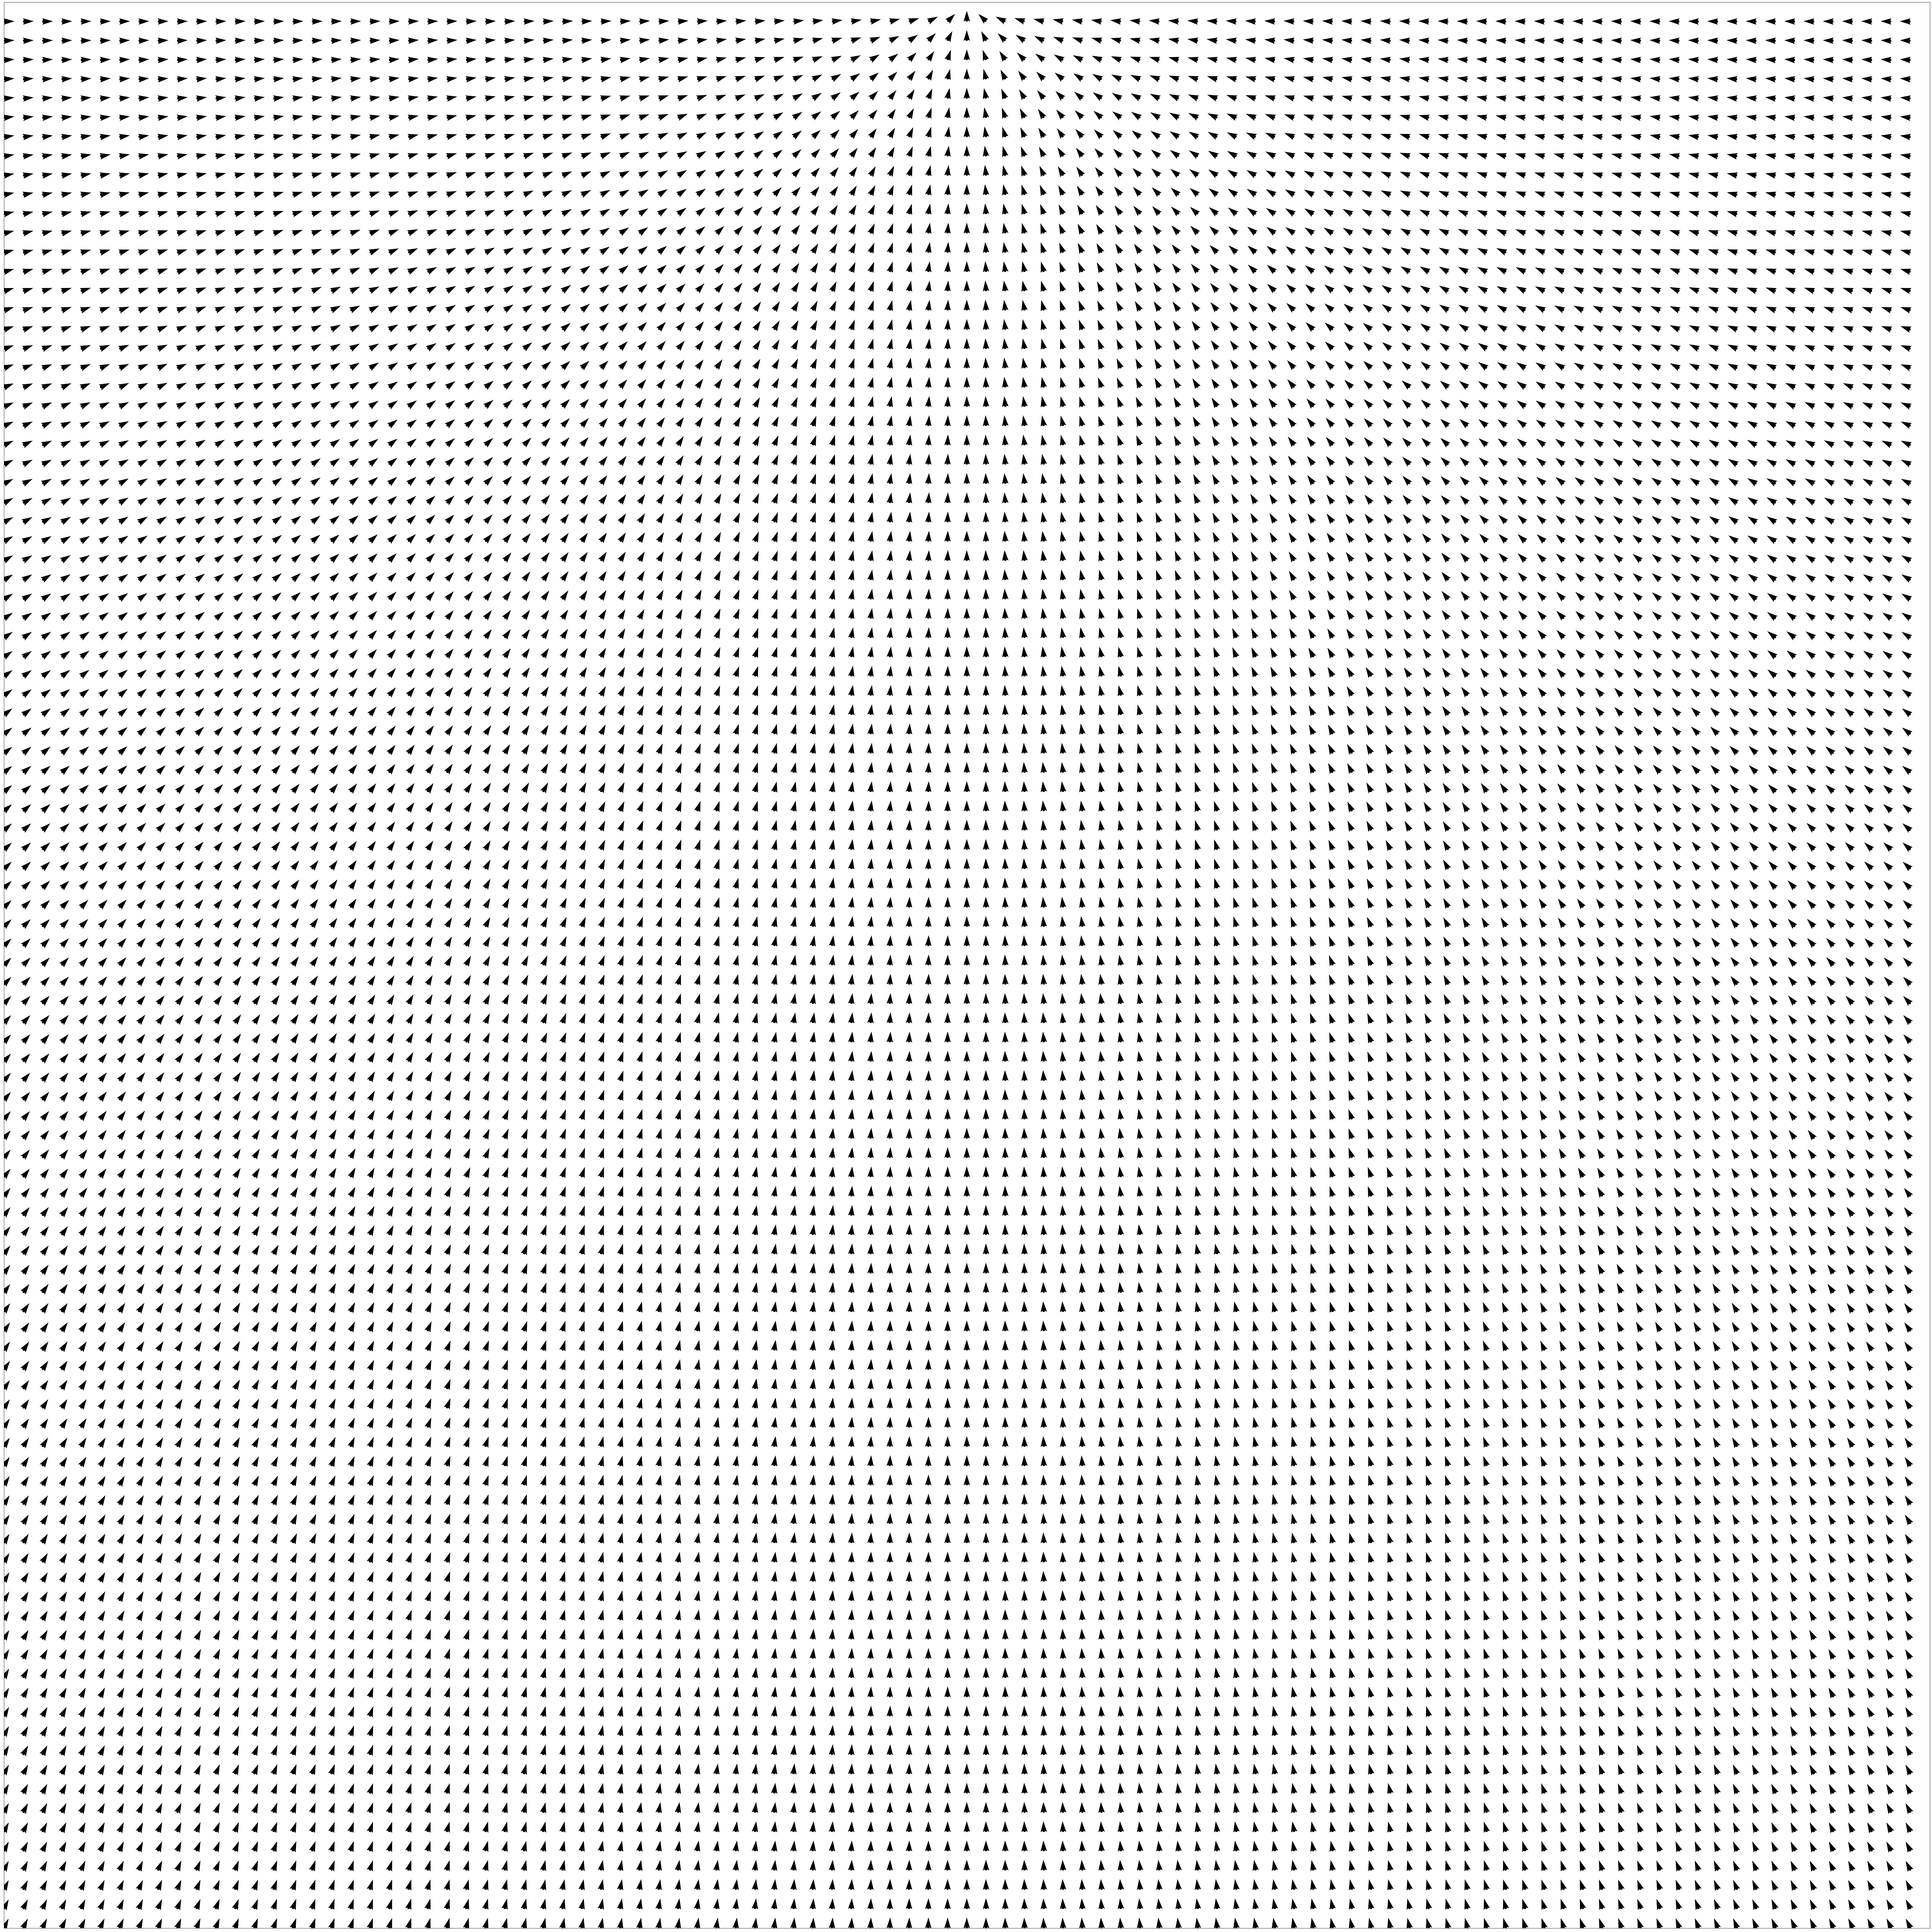

In [16]:
# creating plot
fig, ax = plt.subplots(figsize =(100, 100))
print(len(X), len(Y), len(ux), len(uy))
ax.quiver(X, Y, ux, uy)
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([0, 100, 0, 100])
ax.set_aspect('equal')
 
# show plot
plt.show()

## Gradient Representation

### Vector Matrix(gradient) by directional vectors(norms)

Gives true vector value normalized with its grid size ratio
Should have value between 0 ~ 1 


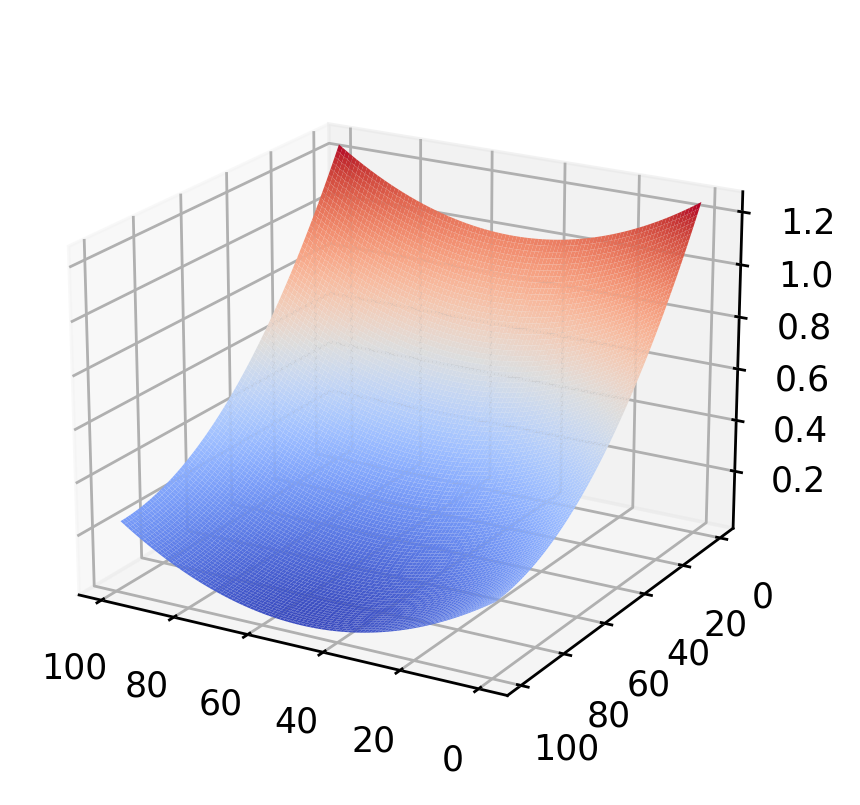

In [138]:
from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(20, 120)
surface = ax.plot_surface(X, Y, np.array(uz),
                          cmap=cm.coolwarm,
                          rstride = 1,
                          cstride = 1)

## Gradient Representation for obstacles

### Form Cylinder matrix

In [241]:
def single_cylinder(xPos, yPos, trueRadius, affectedRadius ,xSize, ySize):
    if (trueRadius > affectedRadius):
        print("This will allow particle to go into the obstacles")
    #Cal
    z_matrix = []
    for y in range (ySize):
        row_matrix = []
        for x in range(xSize):
            #Calculate distance
            partial_distance = [(xPos - x), (yPos - y)]
            distance = math.sqrt(partial_distance[0] ** 2 + partial_distance[1] ** 2)
            #Normalized will have value between 0 ~ 1
            normalized = (xSize - distance) / xSize
            if(distance >= affectedRadius):
                row_matrix.append(0)
            elif(distance < affectedRadius and distance > trueRadius):
                gradient_increase = (normalized - 0.9) * 2
                row_matrix.append(gradient_increase)
            else:
                row_matrix.append(normalized)
        z_matrix.append(row_matrix)
    return z_matrix

In [242]:
#Five cylinder coordinates
cylinder_1 = (50 ,90)
cylinder_2 = (40, 80)
cylinder_3 = (30, 70)
cylinder_4 = (20, 60)
cylinder_5 = (10, 50)

### First cylinder

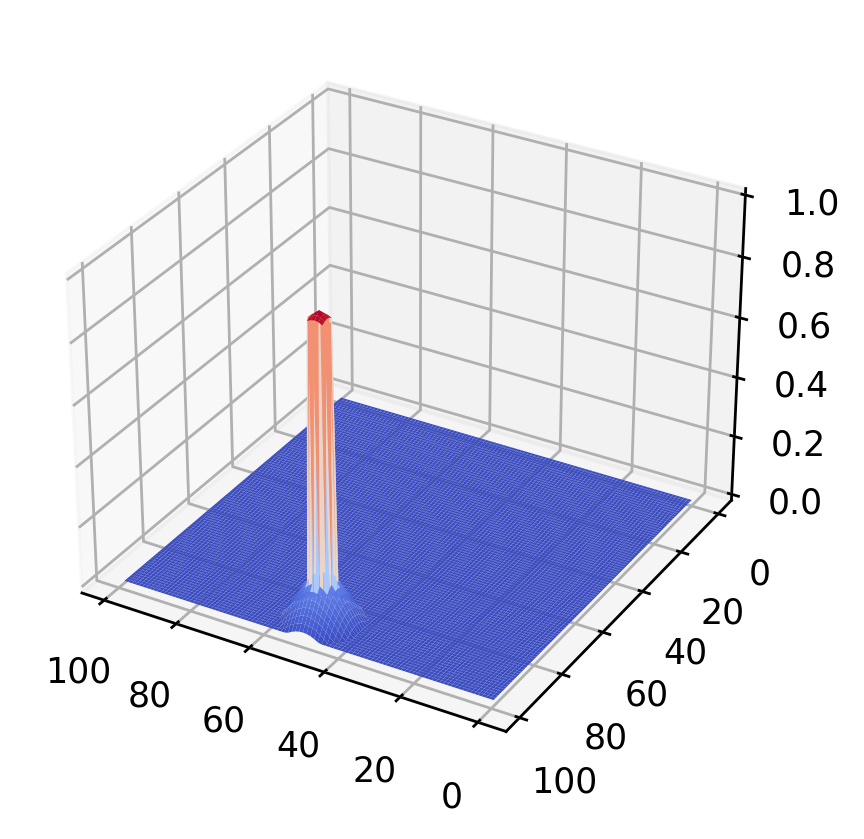

In [243]:
cylinder_1_cost = single_cylinder(cylinder_1[0], cylinder_1[1], 3, 10, len(X), len(Y))

from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 120)
surface = ax.plot_surface(X, Y, np.array(cylinder_1_cost),
                          cmap=cm.coolwarm,
                          rstride = 1,
                          cstride = 1)

### Second Cylinder

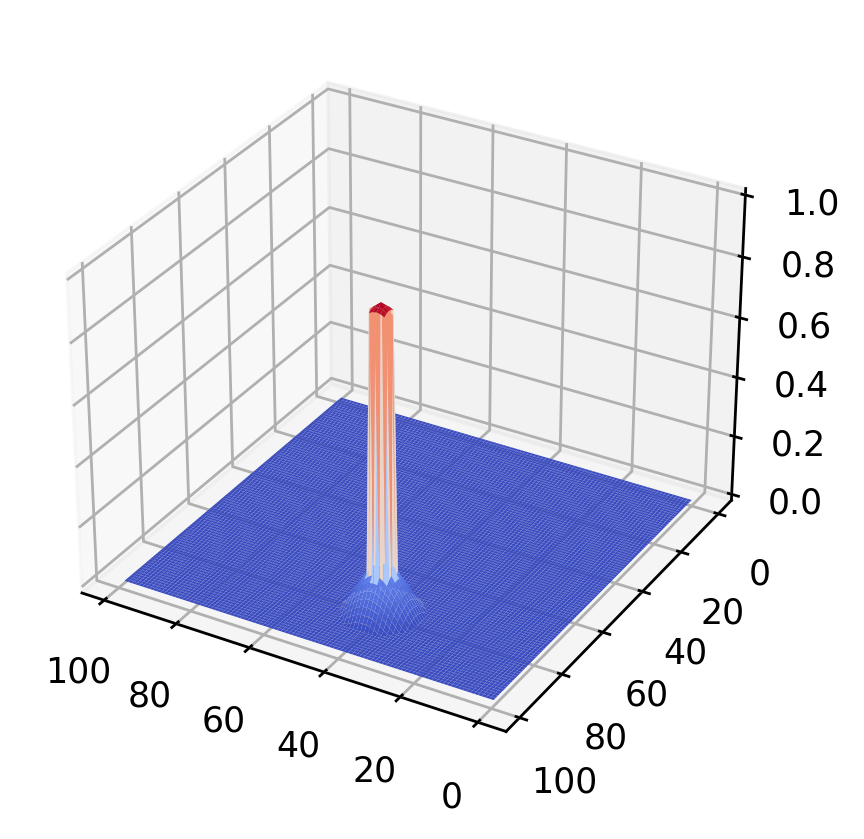

In [244]:
cylinder_2_cost = single_cylinder(cylinder_2[0], cylinder_2[1], 3, 10, len(X), len(Y))

from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 120)
surface = ax.plot_surface(X, Y, np.array(cylinder_2_cost),
                          cmap=cm.coolwarm,
                          rstride = 1,
                          cstride = 1)

### Third Cylinder

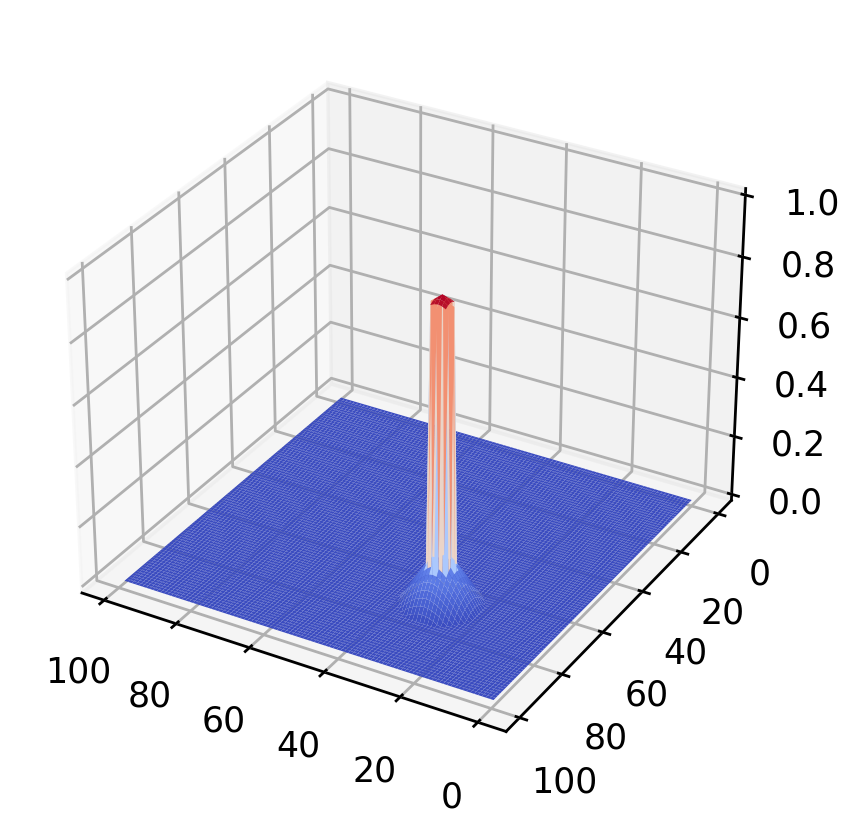

In [245]:
cylinder_3_cost = single_cylinder(cylinder_3[0], cylinder_3[1], 3, 10, len(X), len(Y))

from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 120)
surface = ax.plot_surface(X, Y, np.array(cylinder_3_cost),
                          cmap=cm.coolwarm,
                          rstride = 1,
                          cstride = 1)

### Sum of three cylinders

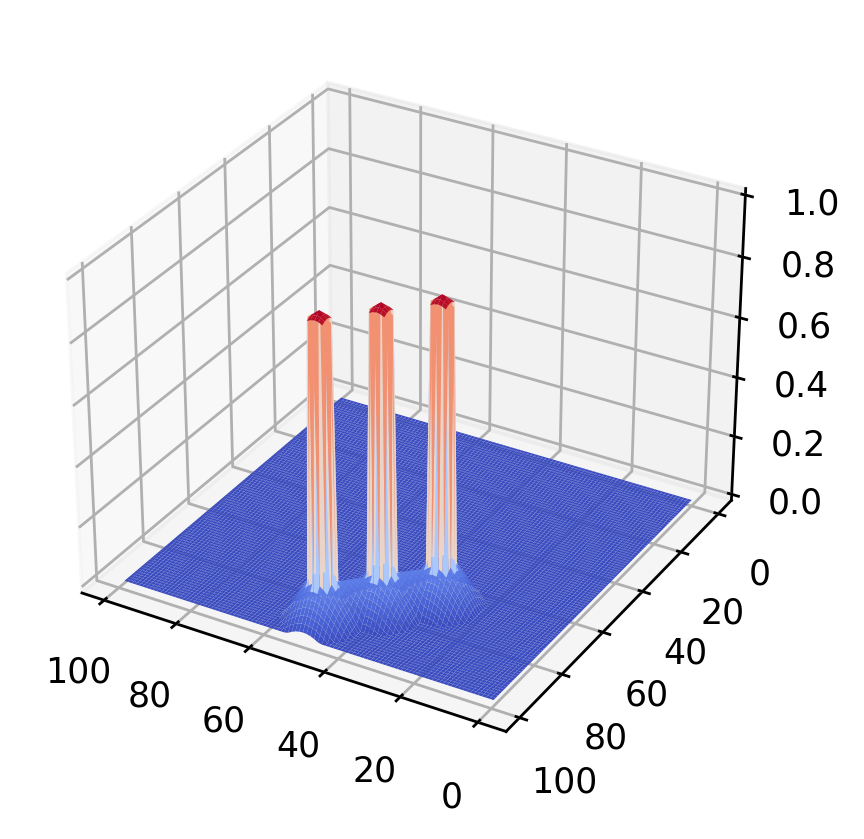

In [246]:
cylinder_cost_sum = np.add(np.add(cylinder_1_cost, cylinder_2_cost), cylinder_3_cost)

from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 120)
surface = ax.plot_surface(X, Y, np.array(cylinder_cost_sum),
                          cmap=cm.coolwarm,
                          rstride = 1,
                          cstride = 1)

### Sum of three cylinders with directional cost

Below image is the final map of minimum cost pathfinding algorithm

In [247]:
total_cost = np.add(cylinder_cost_sum, uz)

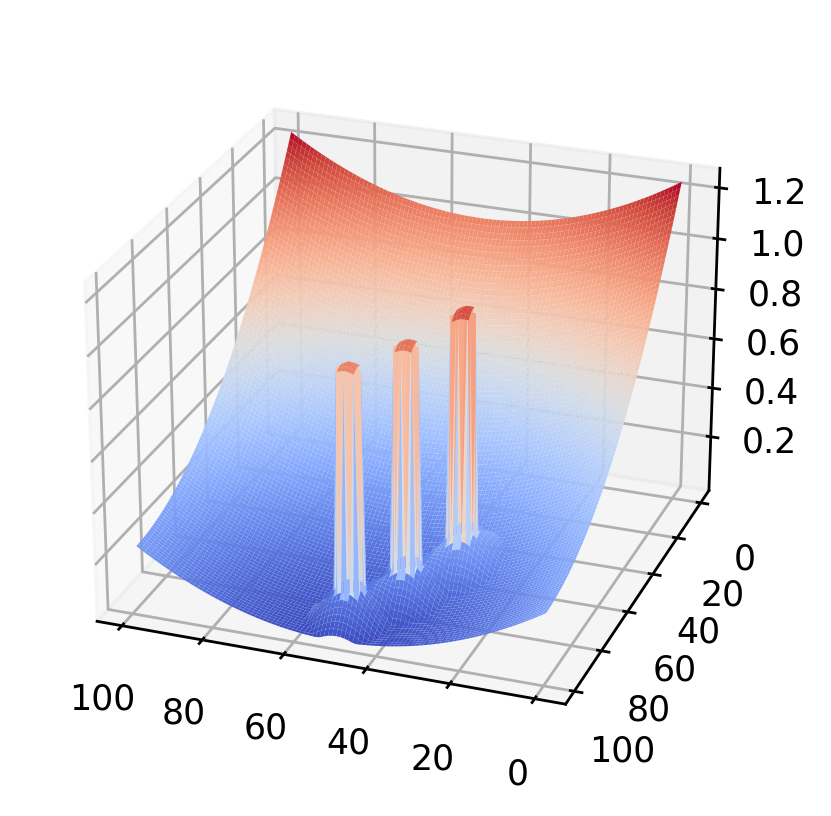

In [248]:
from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(25, 110)
ax.plot_surface(X, Y, total_cost, cmap=cm.coolwarm, rstride = 1,  cstride = 1)
plt.show()